# Lista de Exercícios Cap 2 -

## Livro Cálculo Numérico: Aspectos Teóricos e Computacionais 


Importações de bibliotecas: 

* Numpy para funções *seno*, *cosseno*, *tangente* e *logarítmo neperiano*
* Matplotlib para visualização gráfica
* Pandas para contrução de tabelas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd 

## 1) Localize graficamente as raízes das equações  e compare utilizando o metódo de Newton Raphson assumindo $x_{0}$ próximo a raíz gráfica
***

#### **1.A)**  A equação que queremos encontrar a raiz é:

 ## $$4cos(x) - e^{2x} = 0$$

Vamos então exibir o gráfico desta função considerando que $f(x) = 4cos(x) - e^{2x}$:

In [2]:
# Definições da função 
#definindo eixo X
X = np.arange(-2, 2, 0.1)
#definindo f
f = lambda x: 4 * np.cos(x) - np.exp(2*x)
# calculando o Y = f(x)
Y = [f(x) for x in X]

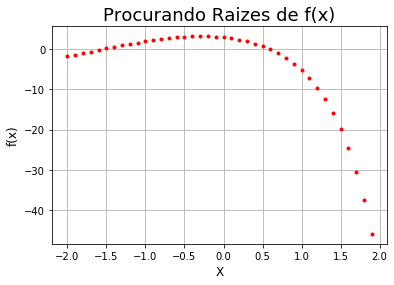

In [3]:
# Produzindo o gráfico 
plt.plot(X,Y, 'r.')
plt.title('Procurando Raizes de f(x)', fontsize=18)
plt.xlabel('X', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.grid()

Através do gráfico é possível verificar que existem duas raízes. Uma próxima de $-1.5$ e outra próxima de $0.6$. Mas para ter uma precisão maior podemos usar o método de Newton-Raphson. O método de Newston-Raphson é definido como: 

### $$ x_{k+1} = x_{k} - \frac{f(x_{k})}{f'(x_{k})},$$ 

onde para um número $k$ de iterações suficientemente grande, a partir de um "*chute*" $x_{0}$ o valor de $x_{k+1}$ tende a uma raíz de $f$. Mas para isso precisamos da derivada de $f$, como já foi definido $f(x)$ agora basta definir $f'(x)$, então: 

Obs: Usei uma [função lambda](https://docs.python.org/3/reference/expressions.html#lambda) para definir $f'(x)$

In [4]:
# sintaxe:
# dfdx = lambda argumento da função : retorno da função 
dfdx = lambda x : -4 * np.sin(x) - 2 * np.exp(2*x)

Definindo o método: 

In [5]:
# definindo o método: 
def newton_raphson(ponto, funcao, derivada):
    return ponto - (funcao(ponto) / derivada(ponto))

### Primeira raiz
Definindo $x_{0}$ sendo um valor próximo de $1.5$ que achamos ser a primeira raiz de $f$, vou supor que seja $-2.0$

In [6]:
x0 = -2.0 # primeiro chute  Xk 
xk = [x0]  

# ralizando a iteração:
for i_iteracoes in range(0,10):
    x_k = newton_raphson(xk[-1], f, dfdx)
    xk.append(x_k)

# exibindo o resultado das possíveis raízes
print(xk)

[-2.0, -1.5325994514414258, -1.559779627727271, -1.5597513182391334, -1.5597513182165117, -1.5597513182165117, -1.5597513182165117, -1.5597513182165117, -1.5597513182165117, -1.5597513182165117, -1.5597513182165117]


In [7]:
# Criando uma lista com f(xk)
f_xk = []
for i in xk:
    f_xk.append(f(i))

#Construindo uma tabela com os resultados
primeira_raiz = pd.DataFrame({
    'Xk':xk,
    'f(x_k)':f_xk   
})

primeira_raiz

,Xk,f(x_k)
0,-2.000000,-1.682903e+00
1,-1.532599,1.061058e-01
2,-1.559780,-1.107298e-04
3,-1.559751,-8.848275e-11
4,-1.559751,-3.538836e-16
5,-1.559751,-3.538836e-16
6,-1.559751,-3.538836e-16
7,-1.559751,-3.538836e-16
8,-1.559751,-3.538836e-16
9,-1.559751,-3.538836e-16


Nesta tabela temos as possíveis raízes na coluna $x_{k}$ e o valor de $x_{k}$ aplicado em $f$ na coluna $f(x_{k})$ a fim de verificar se realmente resulta em $0$.

A apartir da iteração $3$ o valor de $x_{n}$ não muda mais sendo ele igual a $-1.559751$ com o primeiro algarísmo significativo de $f(x_{4})$ na ordem de $10^{-16}$. Então podemos considerar que $x_{4} = -1.559751$ é uma raiz de $f$.

### Segunda raiz
Definindo $x_{0} = 1$ sendo um valor próximo de $0.6$ que achamos ser a segunda raiz de $f$. O processo é o mesmo, após supor um $x_{0}$ realizar a iteração do método de Newton-Raphson

In [8]:
x0 = 1.0 # segundo chute xk 
xk = [x0]  

# ralizando a iteração:
for i_iteracoes in range(0,10):
    x_k = newton_raphson(xk[-1], f, dfdx)
    xk.append(x_k)

# Criando uma lista com f(xk)
f_xk = []
for i in xk:
    f_xk.append(f(i))

#Construindo uma tabela com os resultados
segunda_raiz = pd.DataFrame({
    'Xk':xk,
    'f(x_k)':f_xk   
})

segunda_raiz

,Xk,f(x_k)
0,1.000000,-5.227847e+00
1,0.711869,-1.124045e+00
2,0.608918,-9.879439e-02
3,0.597998,-9.962401e-04
4,0.597886,-1.043784e-07
5,0.597886,-1.332268e-15
6,0.597886,-8.881784e-16
7,0.597886,4.440892e-16
8,0.597886,4.440892e-16
9,0.597886,4.440892e-16


A partir da iteração $4$ o valor de $x_{x}$ não muda mais podemos assumir que $x_{4} = 0.597886$ é uma raiz.

Assim, para a equação $4cos(x) - e^{2x} = 0$, usando o método de Newton-Raphson as raizes são $−1.559751$ e $0.597886$.

#### **1.B)**  A equação que queremos encontrar as raiz é: 

## $$\frac{x}{2} - tg(x) = 0 $$

definindo a função as funções

$$f(x) = \frac{x}{2} - tg(x),$$ 

$$f'(x) = \frac{1}{2} - sec^{2}(x)$$.

Como secante pode ser definida como $sec(x) = \frac{1}{cos(x)}$, então a derivada de $f$ tem a forma:

### $$f'(x) = \frac{1}{2} - \frac{1}{cos^{2}(x)}$$


In [9]:
f = lambda x : (x / 2) - np.tan(x)
dfdx = lambda x : (1/2) - np.power(1/(np.cos(x)), 2)

Exibindo o gráfico: 

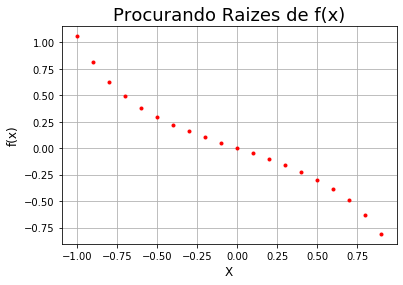

In [10]:
# definindo Eixo X
X = np.arange(-1 , 1, 0.1)
#definindo f(x)
Y = [f(x) for x in X]

# Produzindo o gráfico 
plt.plot(X,Y, 'r.')
plt.title('Procurando Raizes de f(x)', fontsize=18)
plt.xlabel('X', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.grid()

Aparentemente temos uma raiz pŕoxima de $x = 0$, mas vamos confirmar usando o método de Newton-Raphson. Escolhendo $x_{0} = - 0.1$:

In [11]:
x0 = -0.1 # chute
xk = [x0]  

# ralizando a iteração:
for i_iteracoes in range(0,10):
    x_k = newton_raphson(xk[-1], f, dfdx)
    xk.append(x_k)

# Criando uma lista com f(xk)
f_xk = []
for i in xk:
    f_xk.append(f(i))

#Construindo uma tabela com os resultados
primeira_raiz = pd.DataFrame({
    'Xk':xk,
    'f(x_k)':f_xk   
})

primeira_raiz

,Xk,f(x_k)
0,-1.000000e-01,5.033467e-02
1,-1.317538e-03,6.587696e-04
2,-3.049488e-09,1.524744e-09
3,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00
5,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000e+00
8,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00


Neste caso foi possível verificar que a convergência para $x=0$ de forma bem rápida, na $3$ iteração já encontramos a raiz de $f$.

#### **1.C)**  A equação que queremos encontrar a raiz é:

## $$1 - x ln(x) = 0 $$

para criar esta função vamos recorer a função *log* do Numpy. Esta função segundo a documentação do numpy calcula o logarítmo natural ou neperiano, que é o logarítmo na base $e$.

https://numpy.org/doc/stable/reference/generated/numpy.log.html

Definindo $f(x)$  e $f'(x)$: 

$$f(x) = 1 - x \ln{x}$$

$$f'(x) = \ln{x} - 1$$ 

In [12]:
f = lambda x : 1 - x * np.log(x)
dfdx = lambda x : -1 *np.log(x) - 1 

Como a função $log$ só é definida pra reais positivos neste contexto, os valores possíveis para o eixo $x$ são estritamente positivos diferente de zero:

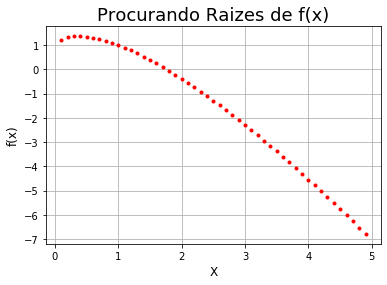

In [13]:
# definindo Eixo X
X = np.arange(0.1, 5, 0.1)
#definindo f(x)
Y = [f(x) for x in X]

# Produzindo o gráfico 
plt.plot(X,Y, 'r.')
plt.title('Procurando Raizes de f(x)', fontsize=18)
plt.xlabel('X', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.grid()

Pode-se notar que próximo à $x=2$, $f$ se aproxima de zero. Então o primeiro chute que será aplicado ao método de Newton-Raphson é $x=2$:

In [14]:
x0 = 2.0 # chute
xk = [x0]  

# ralizando a iteração:
for i_iteracoes in range(0,1000):
    x_k = newton_raphson(xk[-1], f, dfdx)
    xk.append(x_k)

# Criando uma lista com f(xk)
f_xk = []
for i in xk:
    f_xk.append(f(i))

#Construindo uma tabela com os resultados
primeira_raiz = pd.DataFrame({
    'Xk':xk,
    'f(x_k)':f_xk   
})

primeira_raiz

,Xk,f(x_k)
0,2.000000,-3.862944e-01
1,1.771848,-1.353845e-02
2,1.763236,-2.096370e-05
3,1.763223,-5.074252e-11
4,1.763223,-2.220446e-16
...,...,...
996,1.763223,-2.220446e-16
997,1.763223,3.330669e-16
998,1.763223,-2.220446e-16
999,1.763223,3.330669e-16


A partir de $3$ iterações o $x_k$ para de variar. Então é possível que $x=1.763223$ seja uma raíz de $f$.

## 2. Aplicar o método de Newton-Raphson em:

### $$x^{3} - 2x^{2} - 3x + 10 = 0,$$ 

para $x_{0} = 1.9$. 

Justifique a resposta.

In [15]:
f = lambda x : np.power(x,3) - 2 * np.power(x,2) - 3 * x + 10 
dfdx = lambda x : 3 * np.power(x, 2) - 4 * x - 1 

In [16]:
X = np.arange(-5., 5.1, 0.1)
Y = np.array([f(i) for i in X])

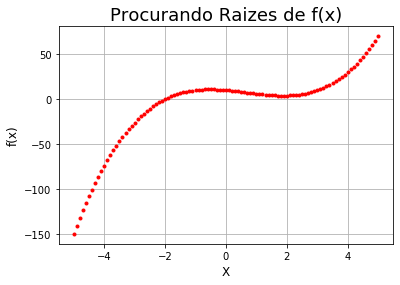

In [17]:
# Produzindo o gráfico 
plt.plot(X,Y, 'r.')
plt.title('Procurando Raizes de f(x)', fontsize=18)
plt.xlabel('X', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.grid()

In [18]:
x0 = 1.9 # chute
xk = [x0]  
# ralizando a iteração:
for i_iteracoes in X:
    x_k = newton_raphson(xk[-1], f, dfdx)
    xk.append(x_k)

# Criando uma lista com f(xk)
f_xk = []
for i in xk:
    f_xk.append(f(i))

#Construindo uma tabela com os resultados
primeira_raiz = pd.DataFrame({
    'Xk':xk,
    'f(x_k)':f_xk   
})

primeira_raiz

,Xk,f(x_k)
0,1.900000,3.939000
1,0.133632,9.565774
2,6.592819,189.849661
3,4.750058,57.799502
4,3.538046,18.638769
...,...,...
97,-2.000000,0.000000
98,-2.000000,0.000000
99,-2.000000,0.000000
100,-2.000000,0.000000
